<a href="https://colab.research.google.com/github/JCaballerot/Machine_learning_program/blob/main/Supervised_models/DecisionTrees_Boosting/Lab_Santander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Santander Customer Satisfaction
</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Santander Problem</a>  
3. <a href="#item33">Descargar y limpiar el Dataset</a>  
4. <a href="#item34">SMOTE Algorithm</a>  
5. <a href="#item34">Decision Trees</a>  
7. <a href="#item34">Cross Validation y GridSearch</a>  
6. <a href="#item34">Random Forest</a>  
8. <a href="#item34">AdaBoost</a>  
9. <a href="#item34">XGBoost</a>
10. <a href="#item34">RandomSearch</a>
11. <a href="#item34">¿Cómo implementar un modelo?</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir modelos de ensemble.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de ensemble.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [1]:

# Scikit-Learn
import sklearn
assert sklearn.__version__ >= "0.20"

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Santander Customer Satisfaction


Desde los equipos de soporte de primera línea hasta los ejecutivos, la satisfacción del cliente es una medida clave del éxito de una empresa. Los clientes insatisfechos no se quedan. Es más, los clientes insatisfechos rara vez expresan su insatisfacción antes de irse.

El banco Santander está pidiendo a la comunidad data scientist que los ayude a identificar clientes insatisfechos desde su primera interacción. Hacerlo permitiría a Santander tomar medidas proactivas para mejorar la felicidad de un cliente antes de que sea demasiado tarde.

En este laboratorio, trabajará con cientos de variables anónimas para predecir si un cliente está satisfecho o insatisfecho con su experiencia bancaria.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/4986/media/santander_custsat_red.png" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué clientes son clientes satisfechos? </div>


<b>Descripción de datos</b>

El data frame de Santander tiene 76,020 filas y 371 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables numéricas. La columna <b>"OBJETIVO"</b> es la variable a predecir. Es igual a uno para clientes insatisfechos y 0 para clientes satisfechos.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente insatisfecho.


---


<strong>Puede consultar este [link](https://www.kaggle.com/c/santander-customer-satisfaction/overview) para leer más sobre la fuente de datos Santander.</strong>


## Descargar y limpiar Dataset


In [2]:
# Cargar Data
import pandas as pd
pddf = pd.read_csv("santander.csv")
pddf.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
pddf.shape

(76020, 371)

In [4]:
# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

<Axes: xlabel='TARGET', ylabel='count'>

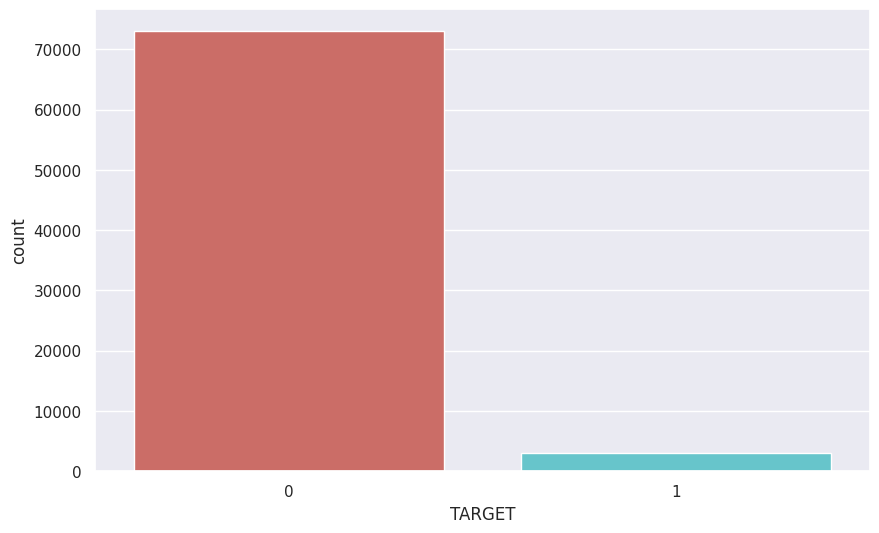

In [5]:
# Analizando el target
sns.countplot(x = 'TARGET', data = pddf, palette = 'hls')


In [6]:
pddf.groupby('TARGET')['ID'].count()

TARGET
0    73012
1     3008
Name: ID, dtype: int64

In [7]:
pddf[['TARGET']].describe()

,TARGET
count,76020.000000
mean,0.039569
std,0.194945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
# Indentificar las variables

features = list(set(pddf.columns.tolist()) - set(['ID','TARGET']))
features

['num_aport_var33_hace3',
 'ind_var29_0',
 'num_aport_var13_ult1',
 'num_trasp_var17_out_ult1',
 'imp_op_var40_efect_ult1',
 'num_op_var39_efect_ult3',
 'saldo_medio_var13_largo_hace3',
 'num_aport_var17_ult1',
 'imp_op_var41_ult1',
 'saldo_medio_var13_largo_hace2',
 'num_reemb_var13_ult1',
 'imp_var7_emit_ult1',
 'delta_num_aport_var17_1y3',
 'saldo_medio_var44_ult1',
 'num_var39_0',
 'saldo_var13',
 'num_var45_hace2',
 'saldo_medio_var13_corto_hace2',
 'num_compra_var44_ult1',
 'saldo_medio_var12_ult1',
 'num_var32',
 'saldo_medio_var29_hace2',
 'num_var37',
 'saldo_medio_var17_hace2',
 'num_meses_var29_ult3',
 'saldo_medio_var17_hace3',
 'ind_var26_cte',
 'ind_var25',
 'saldo_var41',
 'num_var22_ult1',
 'imp_op_var39_efect_ult3',
 'ind_var37_0',
 'ind_var46',
 'delta_num_reemb_var13_1y3',
 'num_trasp_var11_ult1',
 'imp_amort_var34_ult1',
 'imp_aport_var33_ult1',
 'imp_reemb_var17_ult1',
 'imp_aport_var17_hace3',
 'ind_var28_0',
 'num_ent_var16_ult1',
 'ind_var12_0',
 'var15',
 'ind_

In [9]:
# Determinando matrices de datos

X = pddf[features]
y = pddf.TARGET


In [10]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [11]:
y_train.mean()

0.039576051415041155

In [12]:
y_test.mean()

0.03955099535210033

# SMOTE Algorithm


<b>Synthetic Minority Oversampling Technique</b>

Es uno de los métodos de sobremuestreo más utilizados para resolver el problema del desbalanceo.
Su objetivo es equilibrar la distribución de clases aumentando aleatoriamente los ejemplos de clases minoritarias al replicarlos.


SMOTE sintetiza nuevas instancias minoritarias entre instancias minoritarias existentes. Genera los registros de entrenamiento virtual por interpolación lineal para la clase minoritaria. Estos registros de entrenamiento sintéticos se generan seleccionando aleatoriamente uno o más de los k vecinos más cercanos para cada ejemplo en la clase minoritaria. Después del proceso de sobremuestreo, los datos se reconstruyen y se pueden aplicar varios modelos de clasificación para los datos procesados.
¡Más información detallada sobre cómo funciona el algoritmo SMOTE!

<strong>Puede consultar este [link](https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html) para leer más sobre SMOTE.</strong>

<img src="https://i.ytimg.com/vi/U3X98xZ4_no/maxresdefault.jpg" alt="HTML5 Icon" style="width: 400px; height: 250px;">





In [13]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE


In [14]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


<Axes: ylabel='count'>

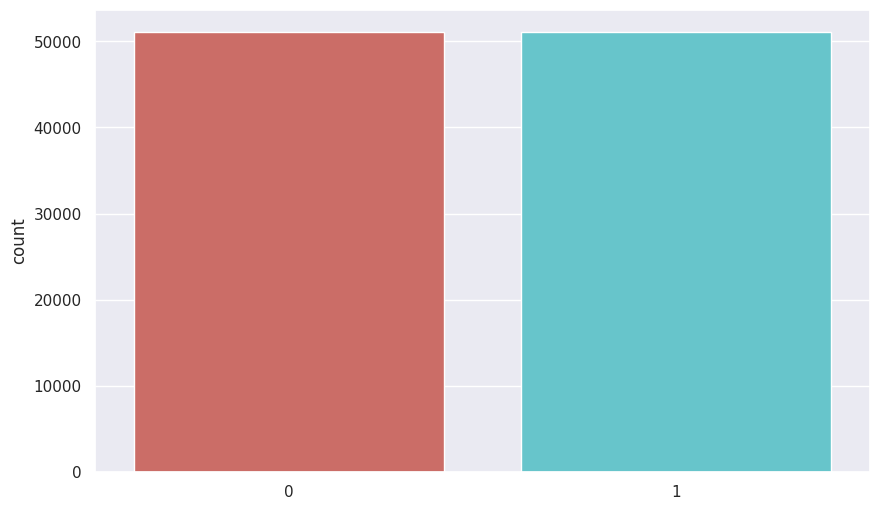

In [15]:
# Analizando el target
sns.countplot(x = y_train_res, palette = 'hls')

# Decision Tree

In [16]:
# Cargar librerías

from sklearn.tree import DecisionTreeClassifier


In [17]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5,
                               #class_weight = {0: 1, 1: 25.272},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)

dtree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.05, random_state=123)

In [18]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


<b>Bondad de ajuste</b>

In [19]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [20]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_smote = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_smote_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_smote_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_smote

,metric,dTree_smote_train,dTree_smote_test
0,AUC,0.800894,0.799110
1,Gini,0.601789,0.598221
2,Accuracy,0.783309,0.788389
3,Precision,0.112491,0.115143
4,Recall,0.649573,0.650776
5,F1-score,0.191771,0.195667


### balanceo por pesos

In [21]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [22]:
y_train.shape[0] - y_train.sum()

51108

In [23]:
y_train.sum()

2106

In [24]:
(y_train.shape[0] - y_train.sum())/y_train.sum()

24.267806267806268

In [25]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5,
                               class_weight = {0: 1, 1: 24.267},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train, y_train)

dtree

DecisionTreeClassifier(class_weight={0: 1, 1: 24.267}, max_depth=5,
                       min_samples_leaf=0.05, random_state=123)

In [26]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [27]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_w = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_w_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_w_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_w

,metric,dTree_w_train,dTree_w_test
0,AUC,0.820066,0.802990
1,Gini,0.640132,0.605980
2,Accuracy,0.704645,0.707402
3,Precision,0.099323,0.095472
4,Recall,0.801045,0.754989
5,F1-score,0.176732,0.169508


In [28]:
# Definiendo modelo

dtree_unb = DecisionTreeClassifier(max_depth = 5,
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree_unb = dtree_unb.fit(X_train[features], y_train)

# Usando el modelo para predecir

X_train['probability_unb'] = dtree_unb.predict_proba(X_train[features])[:,1]
X_test['probability_unb']  = dtree_unb.predict_proba(X_test[features])[:,1]

X_train['prediction_unb'] = dtree_unb.predict(X_train[features])
X_test['prediction_unb']  = dtree_unb.predict(X_test[features])

#Resumen de todas las métricas del modelo
metricsDtree_unb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_unb_train':[roc_auc_score(y_train, X_train.probability_unb),
                                        (roc_auc_score(y_train, X_train.probability_unb)*2-1),
                                        accuracy_score(y_train, X_train.prediction_unb),
                                        precision_score(y_train, X_train.prediction_unb),
                                        recall_score(y_train, X_train.prediction_unb),
                                        f1_score(y_train, X_train.prediction_unb)],

                                'dTree_unb_test':[roc_auc_score(y_test, X_test.probability_unb),
                                        (roc_auc_score(y_test, X_test.probability_unb)*2-1),
                                        accuracy_score(y_test, X_test.prediction_unb),
                                        precision_score(y_test, X_test.prediction_unb),
                                        recall_score(y_test, X_test.prediction_unb),
                                        f1_score(y_test, X_test.prediction_unb)]})


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
temp = pd.merge(metricsDtree_smote, metricsDtree_w, on = ['metric'], how= 'left')
pd.merge(temp, metricsDtree_unb, on = ['metric'], how= 'left')



,metric,dTree_smote_train,dTree_smote_test,dTree_w_train,dTree_w_test,dTree_unb_train,dTree_unb_test
0,AUC,0.800894,0.799110,0.820066,0.802990,0.823127,0.805164
1,Gini,0.601789,0.598221,0.640132,0.605980,0.646253,0.610328
2,Accuracy,0.783309,0.788389,0.704645,0.707402,0.960424,0.960449
3,Precision,0.112491,0.115143,0.099323,0.095472,0.000000,0.000000
4,Recall,0.649573,0.650776,0.801045,0.754989,0.000000,0.000000
5,F1-score,0.191771,0.195667,0.176732,0.169508,0.000000,0.000000


In [30]:
X_train['TARGET'] = y_train

<Axes: >

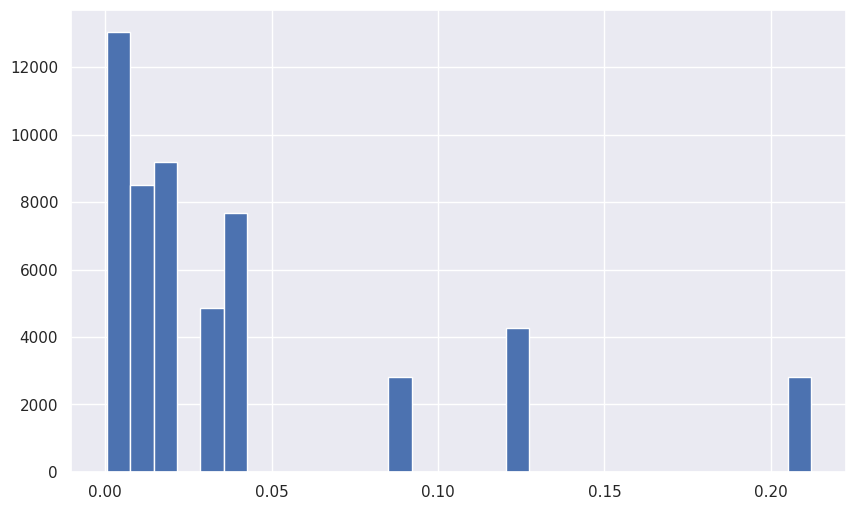

In [31]:
X_train.probability_unb.hist(bins = 30)

In [32]:
X_train.loc[X_train.probability_unb < 0.04].TARGET.mean()

0.016576626494897724

<Axes: >

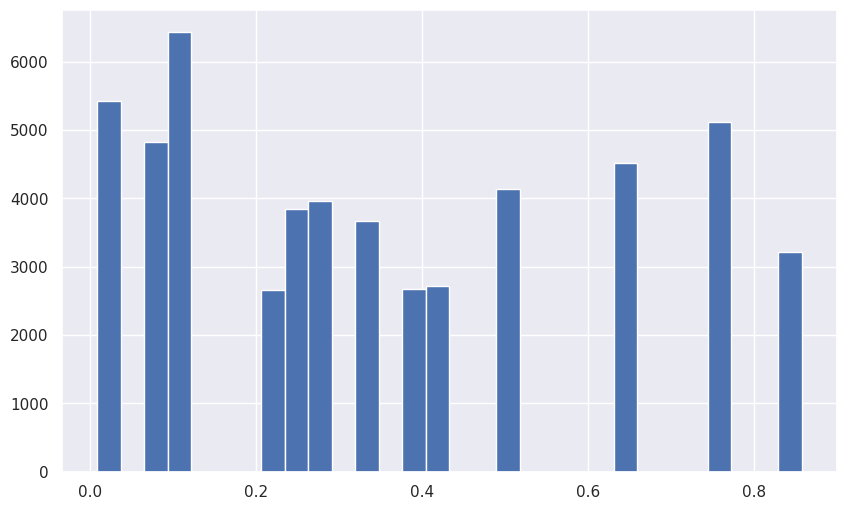

In [33]:
X_train.probability.hist(bins = 30)

In [34]:
X_train.loc[X_train.probability < 0.04].TARGET.mean()

0.0007365126127784938

# Cross Validation



<b>evaluar el desempeño del estimador</b>

 ---

Aprender los parámetros de una función de predicción y probarlos con los mismos datos es un error metodológico: un modelo que simplemente repetiría las etiquetas de las muestras que acaba de ver tendría una puntuación perfecta, pero no podría predecir nada útil datos no vistos.
Esta situación se llama Overfitting. Para evitarlo, es una práctica común cuando se realiza un modelo de machine learning (supervisado) mantener parte de los datos disponibles como un conjunto de pruebas X_test, y_test.



Al evaluar diferentes configuraciones ("hiperparámetros") para estimadores, todavía existe el riesgo de Overfitting en el conjunto de prueba porque los parámetros se pueden ajustar hasta que el estimador funcione de manera óptima. De esta manera, el conocimiento sobre el conjunto de pruebas puede "filtrarse" en el modelo y las métricas de evaluación ya no informan sobre el desempeño de generalización. Para resolver este problema, se puede presentar otra parte del conjunto de datos como el llamado "conjunto de validación": el entrenamiento continúa en el conjunto de entrenamiento, después de lo cual se realiza la evaluación en el conjunto de validación y cuando el experimento parece tener éxito , la evaluación final se puede realizar en el equipo de prueba.





Sin embargo, al dividir los datos disponibles en tres conjuntos, reducimos drásticamente la cantidad de muestras que se pueden usar para aprender el modelo, y los resultados pueden depender de una elección aleatoria particular para el par de conjuntos (entrenamiento, validación).


Una solución a este problema es un procedimiento llamado validación cruzada. Un conjunto de prueba aún debe mantenerse para la evaluación final, pero el conjunto de validación ya no es necesario al hacer CV. En el enfoque básico, llamado k-fold CV, el conjunto de entrenamiento se divide en k conjuntos más pequeños . Se sigue el siguiente procedimiento para cada uno de los k "folds":







1.   Se entrena un modelo utilizando los folds como datos de entrenamiento

2.   El modelo resultante se valida en la parte restante de los datos (es decir, se utiliza como un conjunto de prueba para calcular una medida de rendimiento como la precisión)


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="HTML5 Icon" style="width: 400px; height: 250px;">

---

La medida de rendimiento informada por la validación cruzada de k veces es el promedio de los valores calculados en el ciclo. Este enfoque puede ser computacionalmente costoso, pero no desperdicia demasiados datos (como es el caso cuando se fija un conjunto de validación arbitrario), lo cual es una gran ventaja en problemas como la inferencia inversa donde el número de muestras es muy pequeño.

---


<strong>Puede consultar este [link](https://scikit-learn.org/stable/modules/cross_validation.html) para leer más sobre CrossValidation.</strong>







In [35]:
# Cargar librerías para grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


In [36]:
# Definiendo los parámetros a probar

parameters = {'max_depth': np.linspace(2, 15, 14),
              'min_samples_leaf' : np.array([0.01, 0.025, 0.05, 0.1, 0.2])}


In [37]:
# Definiendo modelo

dtree = DecisionTreeClassifier(random_state = 123)


In [38]:
# Ejecutando grid search con 5 folds

#GridSearch = GridSearchCV(dtree, parameters, cv = 5, verbose = 5, n_jobs = 5,
#                          refit = 'AUC',
#                          return_train_score = True)

#GridSearch.fit(X_train_res, y_train_res.ravel())
#elapsed:  4.6min finished


In [39]:
#GridSearch.best_params_

In [40]:
def plot_search_results(grid):
    """
    Params:
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [41]:
# Calling Method
#plot_search_results(GridSearch)


In [42]:
# Entrenamiento Óptimizado

dtree = DecisionTreeClassifier(max_depth = 6,
                               min_samples_leaf = 0.01,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)

dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.01, random_state=123)

In [43]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)

<b>Bondad de ajuste</b>

In [44]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])


In [45]:
#Resumen de todas las métricas del modelo

metricsDtreeOpt = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtreeOpt

,metric,dTree_train,dTree_test
0,AUC,0.808261,0.798188
1,Gini,0.616523,0.596376
2,Accuracy,0.819127,0.818776
3,Precision,0.133041,0.129727
4,Recall,0.647198,0.627494
5,F1-score,0.220711,0.215005


In [46]:
pd.merge(metricsDtree_smote, metricsDtreeOpt, on = 'metric', how='left')

,metric,dTree_smote_train,dTree_smote_test,dTree_train,dTree_test
0,AUC,0.800894,0.799110,0.808261,0.798188
1,Gini,0.601789,0.598221,0.616523,0.596376
2,Accuracy,0.783309,0.788389,0.819127,0.818776
3,Precision,0.112491,0.115143,0.133041,0.129727
4,Recall,0.649573,0.650776,0.647198,0.627494
5,F1-score,0.191771,0.195667,0.220711,0.215005


<b>Importancias del modelo</b>

In [47]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [48]:

importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : dtree.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
56,ind_var30,0.489974
42,var15,0.279941
75,saldo_var30,0.068178
288,imp_op_var41_efect_ult3,0.044416
186,var38,0.039116
85,saldo_var37,0.021745
139,ind_var37_cte,0.018887
230,num_var22_ult3,0.015894
29,num_var22_ult1,0.006266
111,num_var4,0.005822


# Random Forest

In [49]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)



In [50]:
# Cargando librerías

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import time


In [51]:
# Configurando modelo de random forest

rfc = RandomForestClassifier(n_estimators = 100,
                             max_depth = 6,
                             min_samples_leaf = 0.01,
                             class_weight = {0: 1, 1: 24.267},
                             oob_score = True,
                             verbose = 1,
                             n_jobs = 4,
                             random_state = 123)

#oob_score: Out of bagging score, es el desempeño del modelo en la muestra que se
#queda fuera del proceso de extraccion de subespacios de la data
#es importante analizarlo por si el modelo deja fuera algunas caracteristicas importantes de la data

In [52]:
import multiprocessing
multiprocessing.cpu_count()

2

In [53]:

start_time = time.time()
rfc = rfc.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.8s finished


----4.754159450531006 seconds ---


In [54]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : rfc.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
42,var15,0.148814
193,saldo_var5,0.073645
56,ind_var30,0.070979
75,saldo_var30,0.053130
330,saldo_medio_var5_ult3,0.049627
...,...,...
353,num_var25,0.000036
183,ind_var37,0.000024
217,saldo_var26,0.000020
222,ind_var26,0.000012


In [55]:
# Usando el modelo para predecir

X_train['probability'] = rfc.predict_proba(X_train[features])[:,1]
X_test['probability']  = rfc.predict_proba(X_test[features])[:,1]

X_train['prediction'] = rfc.predict(X_train[features])
X_test['prediction']  = rfc.predict(X_test[features])



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [56]:
#Resumen de todas las métricas del modelo

metricsRfc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'rfc_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'rfc_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsRes = pd.merge(metricsDtree_smote, metricsRfc, on = 'metric', how='left')
metricsRes

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test
0,AUC,0.800894,0.799110,0.803835,0.801882
1,Gini,0.601789,0.598221,0.607670,0.603764
2,Accuracy,0.783309,0.788389,0.707276,0.707007
3,Precision,0.112491,0.115143,0.089774,0.090303
4,Recall,0.649573,0.650776,0.699905,0.706208
5,F1-score,0.191771,0.195667,0.159136,0.160131


# AdaBoost

In [72]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [58]:
# Cargando librerías

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time


In [73]:
# Configuramos el modelo de adaboost

ada_clf = AdaBoostClassifier(
          DecisionTreeClassifier(max_depth = 1),
          n_estimators = 200,
          algorithm = 'SAMME.R',
          learning_rate = 0.5,
          random_state = 123)


In [75]:
start_time = time.time()
ada_clf.fit(X_train[features], y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


----41.195449352264404 seconds ---


In [ ]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : ada_clf.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

In [78]:
# Usando el modelo para predecir

X_train['probability'] = ada_clf.predict_proba(X_train[features])[:,1]
X_test['probability']  = ada_clf.predict_proba(X_test[features])[:,1]

X_train['prediction'] = ada_clf.predict(X_train[features])
X_test['prediction']  = ada_clf.predict(X_test[features])



In [79]:
#Resumen de todas las métricas del modelo

metricsAdab = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'adab_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'adab_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsRes = pd.merge(metricsRes, metricsAdab, on = 'metric', how='left')
metricsRes

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test,adab_train_x,adab_test_x,adab_train_y,adab_test_y
0,AUC,0.800894,0.799110,0.803835,0.801882,0.858622,0.821658,0.858622,0.821658
1,Gini,0.601789,0.598221,0.607670,0.603764,0.717244,0.643317,0.717244,0.643317
2,Accuracy,0.783309,0.788389,0.707276,0.707007,0.960631,0.960405,0.960631,0.960405
3,Precision,0.112491,0.115143,0.089774,0.090303,0.720000,0.444444,0.720000,0.444444
4,Recall,0.649573,0.650776,0.699905,0.706208,0.008547,0.004435,0.008547,0.004435
5,F1-score,0.191771,0.195667,0.159136,0.160131,0.016893,0.008782,0.016893,0.008782


# XGBoost

In [80]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    train_size = 0.6,
                                                    random_state = 123)

X_watch, X_test, y_watch, y_test = train_test_split(X_test, y_test,
                                                    stratify = y_test,
                                                    train_size = 0.5,
                                                    random_state = 123)


In [81]:
print("El tamaño de train es:", len(X_train))
print("El tamaño de test es:", len(X_test))
print("El tamaño de watchlist es:", len(X_watch))

El tamaño de train es: 45612
El tamaño de test es: 15204
El tamaño de watchlist es: 15204


In [82]:
# Cargando librerías
import numpy as np
import xgboost as xgb


In [86]:

dtrain = xgb.DMatrix(X_train, label = y_train)
dwatch = xgb.DMatrix(X_watch, label = y_watch)
dtest  = xgb.DMatrix(X_test, label = y_test)


In [96]:
# Definiendo parámetros

param = {'objective' : 'binary:logistic',
         'max_depth' : 8,
         'learning_rate': 0.05,
         'min_data_leaf' : 0.05,
         'grow_policy' : 'lossguide',
         'seed' : 123}

param['eval_metric'] = 'auc'
num_round = 500
evallist = [(dtrain,'train'), (dwatch,'watchlist')]



In [ ]:
import time

start_time = time.time()
xgBoost = xgb.train(param, dtrain, num_round, evallist,
                    early_stopping_rounds = 5)
print("----%s seconds ---" % ((time.time() - start_time)))


<b>Variables del Modelo</b>

In [ ]:
importance = xgBoost.get_score(importance_type = 'total_gain')
importance

In [ ]:
xgb.plot_importance(xgBoost, max_num_features=20, importance_type = 'total_gain')

In [ ]:
pdVarImp = pd.DataFrame({'Feature': list(importance.keys()),
                         'Importance' : list(importance.values())}).sort_values('Importance', ascending = False)

pdVarImp['C'] = np.arange(len(pdVarImp)) + 1
pdVarImp

In [ ]:
plt.plot(pdVarImp.C,pdVarImp.Importance.cumsum(axis=0))

In [ ]:
pdVarImp['porc_gain'] = pdVarImp.Importance.apply(lambda x: x/pdVarImp.Importance.sum())
plt.plot(pdVarImp.C,pdVarImp.porc_gain.cumsum(axis=0))

In [ ]:
pdVarImp['porc_gain_acum'] = pdVarImp.porc_gain.cumsum(axis = 0)


In [ ]:
pdVarImp.transpose()

In [ ]:
# Usando el modelo para predecir

X_train['probability']  = xgBoost.predict(xgb.DMatrix(X_train[features], label = y_train))
X_test['probability'] = xgBoost.predict(xgb.DMatrix(X_test[features], label = y_test))

X_train['prediction']  = X_train.probability.apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test.probability.apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsXGB = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'xgb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'xgb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsXGB
metricsRes = pd.merge(metricsRes, metricsXGB, on = 'metric', how='left')
metricsRes

# Random Search

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
# setear valores iniciales

paramGrid = {'objetive' : ['binary_logistic'],
         'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
         'seed' : [123],
         'max_leaves' : [2, 4, 8],
         'min_data_leaf' : [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2],
         'grow_policy' : ['lossguide'],
         'min_child_weight' : [1,2,3,4,5,6,7,8,9,10]}

param['eval_metric'] = 'auc'
num_round = 100

pdResults = pd.DataFrame()



In [ ]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)

In [ ]:
# Iniciar iteración de Hyperparámetros
import random

for i in range(100):
  print("****** Iteration : " + str(i))
  param = {}
  for paramName, paramValue in paramGrid.items():
    param[paramName] = random.choice(paramValue)
  param['eval_metric' ] = 'auc'
  evallist = [(dtrain,'train'),(dtest,'valid')]
  num_round = 10

  bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval = 5)

  y_train_pred = bst.predict(dtrain)
  y_test_pred = bst.predict(dtest)

  giniTrain = ((roc_auc_score(y_train, y_train_pred) - 0.5)*200)
  giniTest =  ((roc_auc_score(y_test, y_test_pred) - 0.5)*200)

  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
                                             'paramName': list(param.keys()),
                                             'paramValue': list(param.values()),
                                             'giniTrain' : giniTrain,
                                             'giniTest' : giniTest}))

  pdResults.to_csv('HyperParamSearch.csv', index = False)

In [ ]:
pddf = pd.read_csv("HyperParamSearch.csv")
pddf.sort_values('giniTest', ascending=False)

In [ ]:
pddf['overfitting'] = pddf.giniTrain - pddf.giniTest
pddf.sort_values('overfitting')

In [ ]:
pddf.loc[pddf.overfitting < 4].sort_values('giniTest', ascending = False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pdResults = pdResults[~pdResults.paramName.isin(['objective', 'eval_metric', 'eta'])]
set(pdResults['paramName'])


sns.FacetGrid(pdResults.loc[pdResults.paramName=='learning_rate'],
              row="paramName",
              sharex=False, size=5, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

In [ ]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName",
              sharex=False, size=5, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

# Implementación de Modelos

In [ ]:
import pickle

In [ ]:
xgBoost

In [ ]:
objectToSave = xgBoost
filename = "./XGBoost.xgb"
pickle.dump(objectToSave, open(filename, 'wb'))
print("done")

done


In [ ]:
loaded_model

In [ ]:
filename = "./XGBoost.xgb"
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_model

In [ ]:
loaded_model.predict(xgb.DMatrix(X_test[features], label = y_test))


array([0.05334991, 0.07263374, 0.0490824 , ..., 0.05132154, 0.14337361,
       0.05334991], dtype=float32)

---

# Gracias por completar este laboratorio!

---

